# Analysis on Accidents data of India

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns

In [2]:
df19 = pd.read_csv("dataset/accident gender/2019 accident gender.csv",nrows = 39)
df18 = pd.read_csv("dataset/accident gender/2018 accident gender.csv",nrows= 39)
df17 = pd.read_csv("dataset/accident gender/2017 accident gender.csv",encoding = "cp1252",nrows = 39)
df16 = pd.read_csv("dataset/accident gender/2016 accident gender.csv",nrows = 39)
df15 = pd.read_csv("dataset/accident gender/2015 accident gender.csv",nrows = 39)
df20 = pd.read_csv("dataset/accident gender/2020 accident gender.csv")


Preprocessing

In [3]:
df19.columns = np.arange(df19.shape[1])
df19 = df19[[0,1,26,27,28,29]]
df18.columns = np.arange(df18.shape[1])
df18 = df18[[1,2,27,28,29,30]]
df17.columns = np.arange(df17.shape[1])
df17 = df17[[1,2,27,28,29,30]]
df16.columns = np.arange(df16.shape[1])
df16 = df16[[1,2,27,28,29,30]]
df15.columns = np.arange(df15.shape[1])
df15 = df15[[1,2,27,28,29,30]]

In [4]:
for i in [df19,df18,df17,df16,df15]:
    merge_ut = i.iloc[32:34].sum()
    i.loc[32] = merge_ut
    i.drop(33,inplace = True)
#     i.iloc[32,0],i.iloc[32,1] = "UT","Dadar and Nagar Haveli"
df20.drop(33,inplace = True)

In [5]:
arr_final = df20.iloc[:,-4:].to_numpy()
for i in [df19,df18,df17,df16,df15]:
    temp = i.iloc[:,-4:]
    arr_final += temp.to_numpy()
arr_final
df = pd.DataFrame(arr_final,columns = list(df20.columns)[-4:])
df.insert(0,'State/UT',list(df20['State/UT']))
df.columns = ['State','Male','Female','Transgender','Total']

# Accidental Deaths Count Yearwise for India 

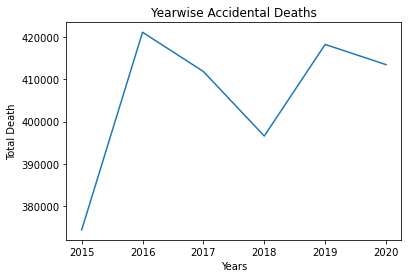

In [6]:
total_deaths = []
for i in [df20,df19,df18,df17,df16,df15]:
    total_deaths.append(i.iloc[-1,-1])
year = [i for i in range(2015,2021)]
plt.title("Yearwise Accidental Deaths")
plt.xlabel("Years")
plt.ylabel("Total Death")
plt.plot(year,total_deaths)

# State wise number of accidental deaths

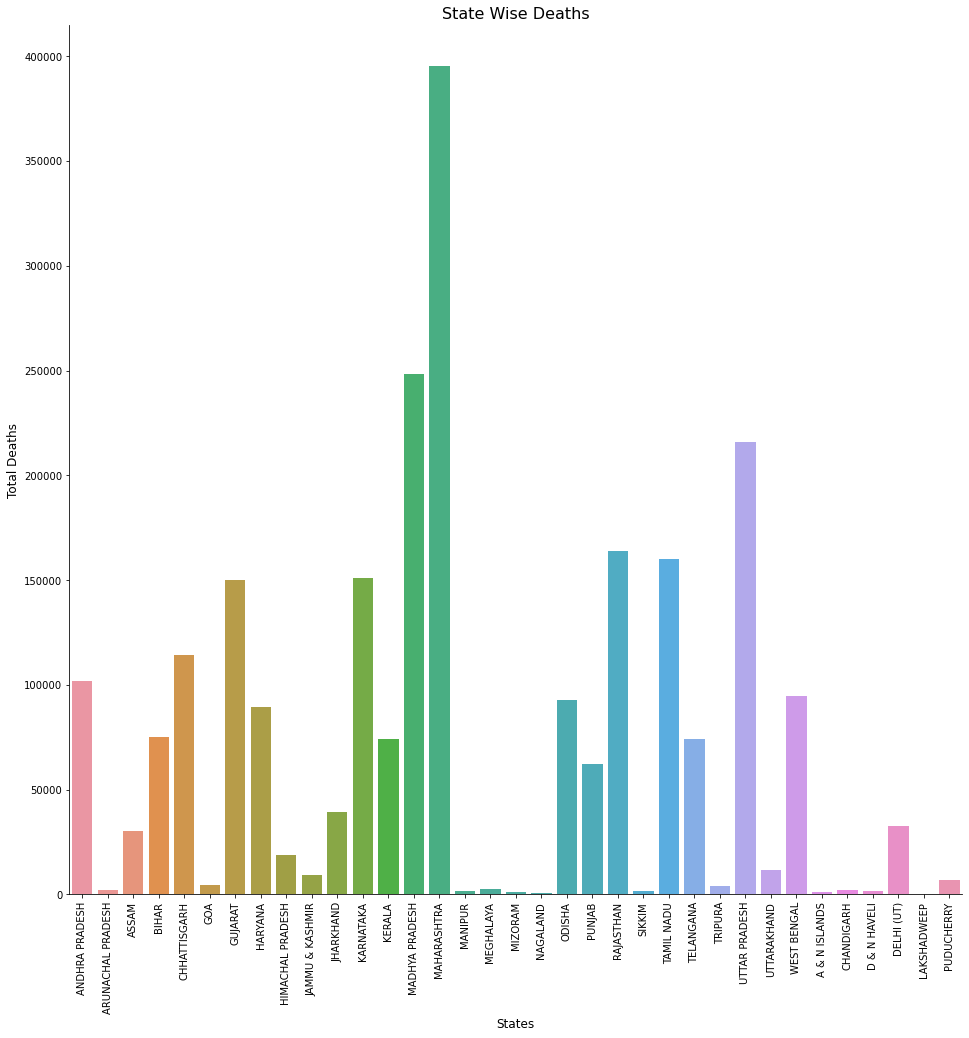

We can see that Maharashtra is the top state with most number of accidents


In [7]:
temp = df.drop([29,36,37])
plt.figure(figsize=(16,16))
sns.barplot(x = temp.State,y =temp.Total)
plt.ylabel("Total Deaths",fontsize = 12)
plt.xlabel("States",fontsize = 12)
plt.xticks(rotation=90)
# for index, value in enumerate(list(temp.Total)):
#     plt.text(value, index, str(value),fontweight = 'bold')
plt.title("State Wise Deaths",fontsize = 16)
sns.despine()
plt.show()
print('We can see that Maharashtra is the top state with most number of accidents')


# Male to Female accidental deaths for India

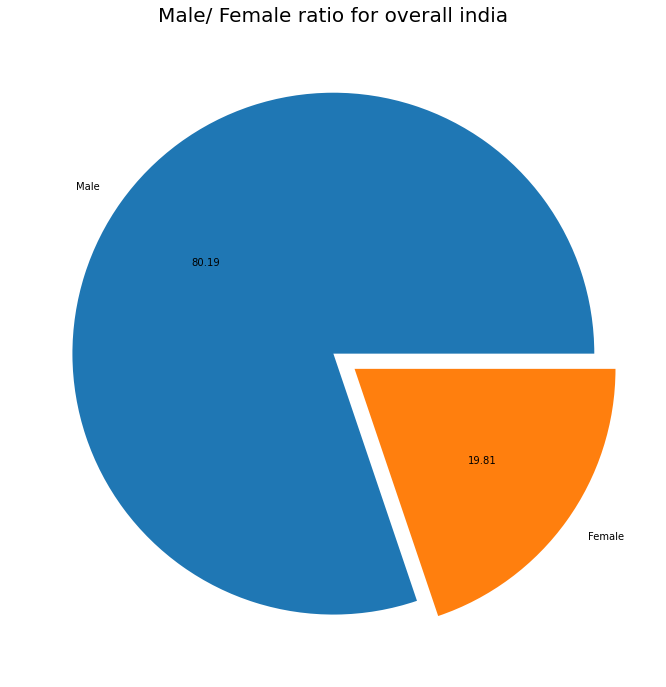

We can see that males percentage share is more 80.19%


In [8]:
x= df.iloc[-1][1]
y= df.iloc[-1][2]
plt.figure(figsize=(12,12))

plt.pie([x,y],autopct='%1.2f',labels=['Male','Female'],explode=[0,0.1])
plt.rcParams['font.size'] = 12.0
plt.fontsize=20
plt.title('Male/ Female ratio for overall india', fontsize=20)
plt.show()
print('We can see that males percentage share is more 80.19%')

# Top states with most and least number of accidents 

In [9]:
# top 5 states and least 5 states for number of accidents(male)

states= df.iloc[:29,0]
males= df.iloc[:29,1]
females= df.iloc[:29,2]
trans= df.iloc[:29,3]
# top 5 states
x=[]
y=[]
z=[]
for i in range(len(states)):
    x.append([states[i],males[i]])
    y.append([states[i],females[i]])
    z.append([states[i],trans[i]])
    
xs= sorted(x,  key = lambda x: x[1],reverse=True)
ys= sorted (y, key = lambda x: x[1],reverse=True)
zs= sorted(z,  key = lambda x: x[1],reverse=True)
print("Top 5 states with the most number of accidents(male) are : ")
for i in range(5):
    print(str(i+1)+ " "+str(xs[i][0])+" "+str(xs[i][1]))
print('\n\n')
print("Top 5 states with the most number of accidents(female) are : ")
for i in range(5):
    print(str(i+1)+ " "+str(ys[i][0])+" "+str(ys[i][1]))    
print('\n\n')
print("Top 5 states with the most number of accidents(transgender) are : ")
for i in range(5):
    print(str(i+1)+ " "+str(zs[i][0])+" "+str(zs[i][1]))

Top 5 states with the most number of accidents(male) are : 
1 MAHARASHTRA 310746
2 MADHYA PRADESH 185935
3 UTTAR PRADESH 175938
4 RAJASTHAN 134046
5 TAMIL NADU 129413



Top 5 states with the most number of accidents(female) are : 
1 MAHARASHTRA 84486
2 MADHYA PRADESH 62404
3 UTTAR PRADESH 39742
4 TAMIL NADU 30724
5 RAJASTHAN 29968



Top 5 states with the most number of accidents(transgender) are : 
1 MAHARASHTRA 42
2 UTTAR PRADESH 37
3 KARNATAKA 21
4 GUJARAT 18
5 TAMIL NADU 17


In [10]:
#least 5 states with least number of accidents
xs1= sorted(x,  key = lambda x: x[1])
ys1= sorted (y, key = lambda x: x[1])
zs1= sorted(z,  key = lambda x: x[1])
print("Least 5 states with the least number of accidents(male) are :")
for i in range(5):
    print(str(i+1)+ " "+str(xs1[i][0])+" "+str(xs1[i][1]))
print('\n\n')
print("Least 5 states with the least number of accidents(female) are :")
for i in range(5):
    print(str(i+1)+ " "+str(ys1[i][0])+" "+str(ys1[i][1]))    
print('\n\n')
print("Least 5 states with the least number of accidents(transgender) are :")
for i in range(5):
    print(str(i+1)+ " "+str(zs1[i][0])+" "+str(zs1[i][1]))


Least 5 states with the least number of accidents(male) are :
1 NAGALAND 416
2 MIZORAM 960
3 SIKKIM 1371
4 MANIPUR 1522
5 ARUNACHAL PRADESH 1699



Least 5 states with the least number of accidents(female) are :
1 NAGALAND 58
2 MIZORAM 195
3 MANIPUR 225
4 SIKKIM 296
5 ARUNACHAL PRADESH 324



Least 5 states with the least number of accidents(transgender) are :
1 BIHAR 0
2 GOA 0
3 HIMACHAL PRADESH 0
4 MANIPUR 0
5 MIZORAM 0


# State wise Accidental Deaths for Male- Female 

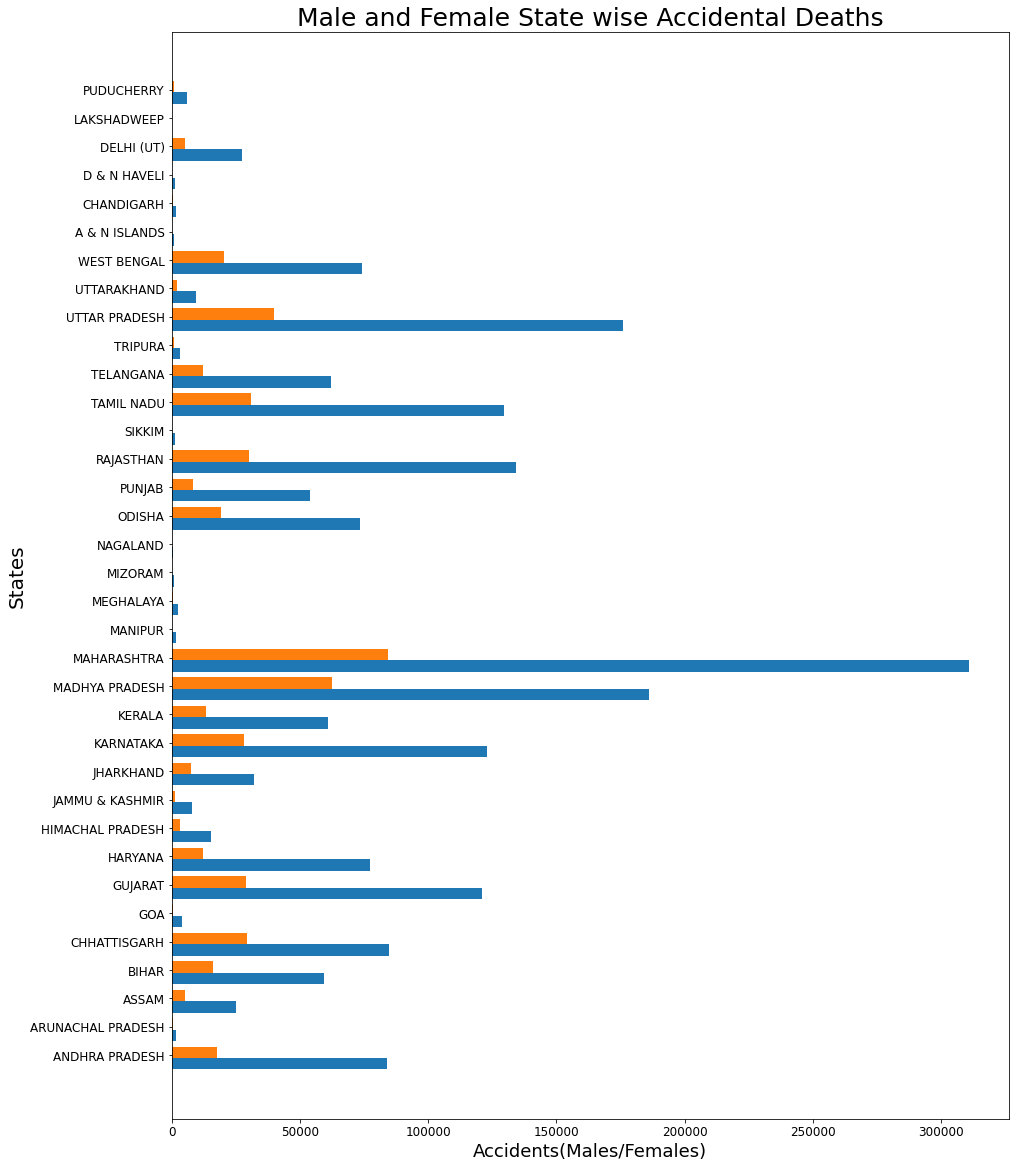

In [11]:
temp = df.drop([29,36,37])
males = list(temp["Male"])
females = list(temp["Female"])
labels = list(temp["State"])
plt.figure(figsize = (15,20))
plt.title("Male and Female State wise Accidental Deaths",fontsize = 25)
Y_axis = np.arange(len(males))
plt.barh(Y_axis - 0.2, males, 0.4, label = 'Males')
plt.barh(Y_axis + 0.2, females, 0.4, label = 'Females')
plt.xlabel("Accidents(Males/Females)",fontsize = 18)
plt.ylabel("States",fontsize = 20)
plt.yticks([i+0.1 for i in Y_axis],labels)
plt.show()